In [31]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import SpectralEmbedding

# #############################################################################
# Get sample data
iris = datasets.load_iris()
numFeatures = 4
X = iris.data[:, :numFeatures]
mat = []
for i in range(0, len(X)):
    mat.append(X[i])
mat = np.matrix(mat, dtype = float)

# #############################################################################
# Print to file to run in Urerf

with open('outTestMat.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, fmt='%.2f')           
print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")



Feature matrix of shape (150, 4) outputted. Run Urerf in R now.


In [77]:

### matrices to hold the best data outputs for changing urerf parameters ###
### format of matrics is [changingParameter, clusters, ari, anyadditionalparameters] ####
### Note standard parameters for each value are as follows:
        # num trees = 500
        # k = 10
        # depth = 4
        # dim = 2
k_varying = [10,15,20,30,60,90,120]
depth_varying = [4,6,8,10,12,15,20]
dim = [2,3,4,5,7,10]
# dataMini_kvalue = []
# dataKmeans_depth = []
# dataGMM_kvalue = []
# dataMini_depth = []
# dataKmeans_kvalue = []
# dataGMM_depth = []
# dataMini_dim = []
# dataKmeans_dim = []
# dataGMM_dim = []

In [64]:
##### Clustering ######

def MiniBatchKMeansClustering(inputMat, clustInit = 1, clustInc = 1, batchSizeInit = 40, batchSizeInc = 10):
    maxClusters = 0
    maxSize = 0
    maxARI = 0
    clust = clustInit
    while clust < (len(inputMat)/4):
        #vary the cluster number
        batchSize = batchSizeInit
        clust = clust + clustInc
        while batchSize < len(inputMat):
            #vary the batch size
            batchSize = batchSize + batchSizeInc
            mb = MiniBatchKMeans(n_clusters = clust, batch_size = batchSize).fit(inputMat)
            cluster_centers_ = mb.cluster_centers_
            labels = mb.labels_
            
            ari = adjusted_rand_score(iris.target, labels)
            print('|BatchSize |% 1.2f' %  batchSize, "| Clusters | % 1.1f" % clust, "| ARI | % 1.3f" % ari, "|")

            #capture best clusters and batchsize
            if (ari > maxARI):
                maxClusters = clust
                maxSize = batchSize
                maxARI = ari
                ss = silhouette_score(inputMat, labels)
    print("Best Batch Size:", maxSize, "Best Num Clusters:", maxClusters)
    return maxClusters, maxSize, maxARI

def GMMClustering(inputMat, clustInit = 1, clustInc = 1):
    maxClusters = 0
    maxSize = 0
    maxARI = 0
    clust = clustInit
    while clust < (len(inputMat)/4):
        #vary the cluster number
        clust = clust + clustInc
        gm = GaussianMixture(n_components = clust)
        gm.fit(inputMat)
        labels = gm.predict(inputMat)
        ari = adjusted_rand_score(iris.target, labels)
        print("| Clusters | % 1.1f" % clust, "| ARI | % 1.3f" % ari, "|")

        #capture best clusters and batchsize
        if (ari > maxARI):
            maxClusters = clust
            maxARI = ari
            ss = silhouette_score(inputMat, labels)
    print("Best Num Clusters:", maxClusters)
    return maxClusters, maxARI

def KMeansClustering(inputMat, clustInit = 1, clustInc = 1):
    maxClusters = 0
    maxSize = 0
    maxARI = 0
    clust = clustInit
    while clust < (len(inputMat)/4):
        #vary the cluster number
        clust = clust + clustInc
        km = KMeans(n_clusters = clust).fit(inputMat)
        cluster_centers_ = km.cluster_centers_
        labels = km.labels_
            
        ari = adjusted_rand_score(iris.target, labels)
        print("| Clusters | % 1.1f" % clust, "| ARI | % 1.3f" % ari, "|")

        #capture best clusters and batchsize
        if (ari > maxARI):
            maxClusters = clust
            maxARI = ari
            ss = silhouette_score(inputMat, labels)
    print("Best Num Clusters:", maxClusters)
    return maxClusters, maxARI



In [34]:
###### Plotting ######
def graph2DLabels(mat, labels):
    fig = plt.figure(3, figsize=(10, 10))
    ax = plt.Axes(fig, rect=[0, 0, .5, .5])
    z = list(labels)
    N = len(mat[:,1])
    x = [mat[:,0]]
    y = [mat[:,1]]
    cmap = matplotlib.cm.get_cmap('plasma')
    normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
    colors = [cmap(normalize(value)) for value in z]
    plt.scatter(x, y, color = colors)
    plt.title("Iris Dataset")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
def graph3DLabels(mat, labels):
    fig = plt.figure(4, figsize=(10, 10))
    ax = Axes3D(fig, rect=[0, 0, .5, .5], elev=40, azim=150)
    ax.scatter(mat[:, 0], mat[:, 1], mat[:, 2], c=labels, cmap = "plasma")
    ax.set_title("Iris Dataset")
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

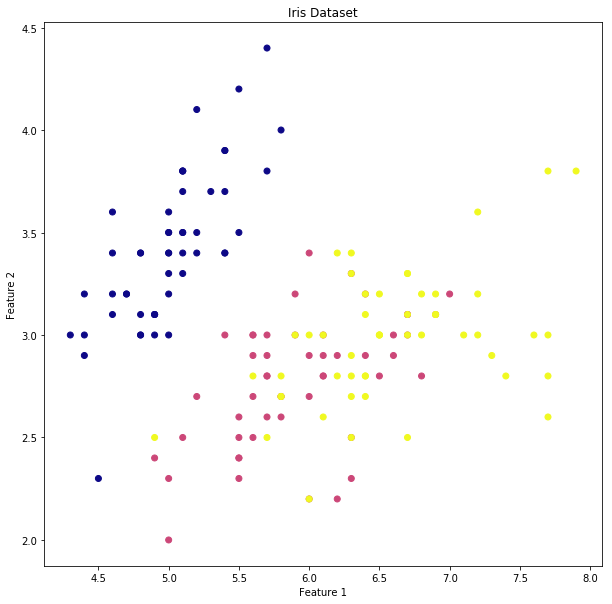

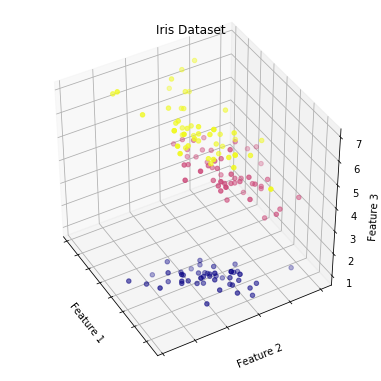

In [35]:
plt.figure(1)
graph2DLabels(mat, iris.target)
plt.figure(2)
graph3DLabels(mat, iris.target)

In [84]:
## Load similarity matrix from Urerf
matrix = open('inTestMat.txt').read()
matrix = [item.split() for item in matrix.split('\n')[:-1]]
inputMat = np.matrix(matrix, dtype = float)
print(inputMat.shape)
n = 2
i = 6
embedding = SpectralEmbedding(n_components=n, affinity = 'precomputed')
inputMat_transformed = embedding.fit_transform(inputMat)

print("MINI BATCH K MEANS")
maxClusters, maxSize, maxAri = MiniBatchKMeansClustering(inputMat_transformed, 1, 1, 0, 50)
dataMini_depth.append([depth_varying[i], maxClusters,  maxAri])
print("K MEANS")
maxClusters, maxAri = KMeansClustering(inputMat_transformed, 1, 1)
dataKmeans_depth.append([depth_varying[i], maxClusters,  maxAri])
print("GMM")
maxClusters, maxAri = GMMClustering(inputMat_transformed, 1, 1)
dataGMM_depth.append([depth_varying[i], maxClusters,  maxAri])

(150, 150)
MINI BATCH K MEANS
|BatchSize | 50.00 | Clusters |  2.0 | ARI |  0.568 |
|BatchSize | 100.00 | Clusters |  2.0 | ARI |  0.568 |
|BatchSize | 150.00 | Clusters |  2.0 | ARI |  0.568 |
|BatchSize | 50.00 | Clusters |  3.0 | ARI |  0.717 |
|BatchSize | 100.00 | Clusters |  3.0 | ARI |  0.728 |
|BatchSize | 150.00 | Clusters |  3.0 | ARI |  0.728 |
|BatchSize | 50.00 | Clusters |  4.0 | ARI |  0.677 |
|BatchSize | 100.00 | Clusters |  4.0 | ARI |  0.677 |
|BatchSize | 150.00 | Clusters |  4.0 | ARI |  0.683 |
|BatchSize | 50.00 | Clusters |  5.0 | ARI |  0.660 |
|BatchSize | 100.00 | Clusters |  5.0 | ARI |  0.652 |
|BatchSize | 150.00 | Clusters |  5.0 | ARI |  0.652 |
|BatchSize | 50.00 | Clusters |  6.0 | ARI |  0.587 |
|BatchSize | 100.00 | Clusters |  6.0 | ARI |  0.587 |
|BatchSize | 150.00 | Clusters |  6.0 | ARI |  0.587 |
|BatchSize | 50.00 | Clusters |  7.0 | ARI |  0.568 |
|BatchSize | 100.00 | Clusters |  7.0 | ARI |  0.425 |
|BatchSize | 150.00 | Clusters |  7.0 | A

| Clusters |  21.0 | ARI |  0.162 |
| Clusters |  22.0 | ARI |  0.186 |
| Clusters |  23.0 | ARI |  0.177 |
| Clusters |  24.0 | ARI |  0.146 |
| Clusters |  25.0 | ARI |  0.146 |
| Clusters |  26.0 | ARI |  0.141 |
| Clusters |  27.0 | ARI |  0.129 |
| Clusters |  28.0 | ARI |  0.128 |
| Clusters |  29.0 | ARI |  0.126 |
| Clusters |  30.0 | ARI |  0.123 |
| Clusters |  31.0 | ARI |  0.129 |
| Clusters |  32.0 | ARI |  0.109 |
| Clusters |  33.0 | ARI |  0.111 |
| Clusters |  34.0 | ARI |  0.118 |
| Clusters |  35.0 | ARI |  0.102 |
| Clusters |  36.0 | ARI |  0.104 |
| Clusters |  37.0 | ARI |  0.096 |
| Clusters |  38.0 | ARI |  0.098 |
Best Num Clusters: 4


[[  4.           3.           0.74240643]
 [  6.           3.           0.74169192]
 [  8.           3.           0.71398039]
 [ 10.           3.           0.72754286]
 [ 12.           3.           0.72754286]
 [ 15.           3.           0.70078367]
 [ 20.           3.           0.72754286]]
[[  4.           3.           0.71398039]
 [  6.           3.           0.72754286]
 [  8.           3.           0.71398039]
 [ 10.           3.           0.72754286]
 [ 12.           3.           0.71398039]
 [ 15.           3.           0.70078367]
 [ 20.           3.           0.77086554]]
[[  4.           5.           0.63465929]
 [  6.           5.           0.63160261]
 [  8.           5.           0.63465929]
 [ 10.           5.           0.64442617]
 [ 12.           4.           0.64981769]
 [ 15.           3.           0.71398039]
 [ 20.           4.           0.65755725]]
[[  10.            3.            0.72754286]
 [  15.            3.            0.72754286]
 [  20.            3.    

(2, 6)

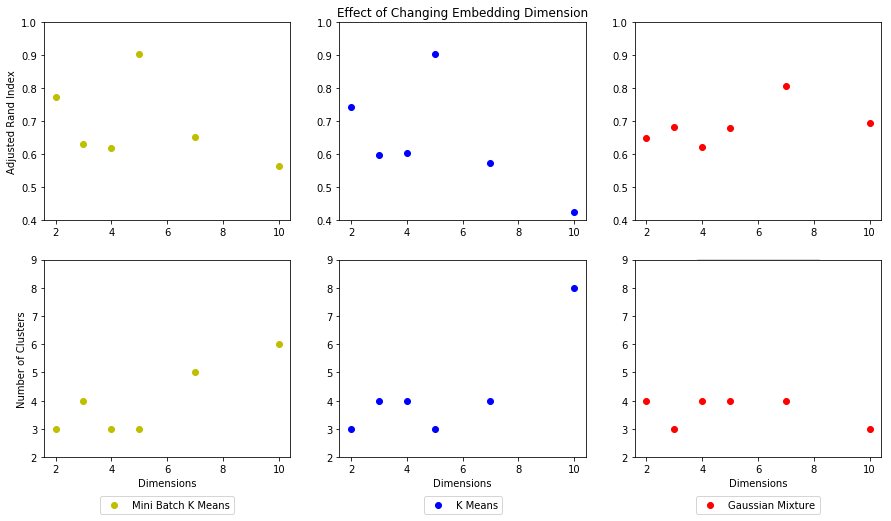

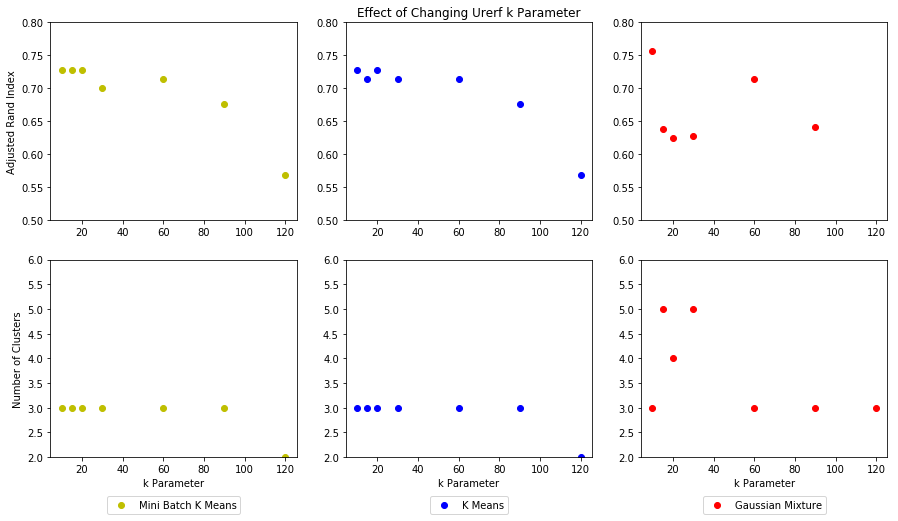

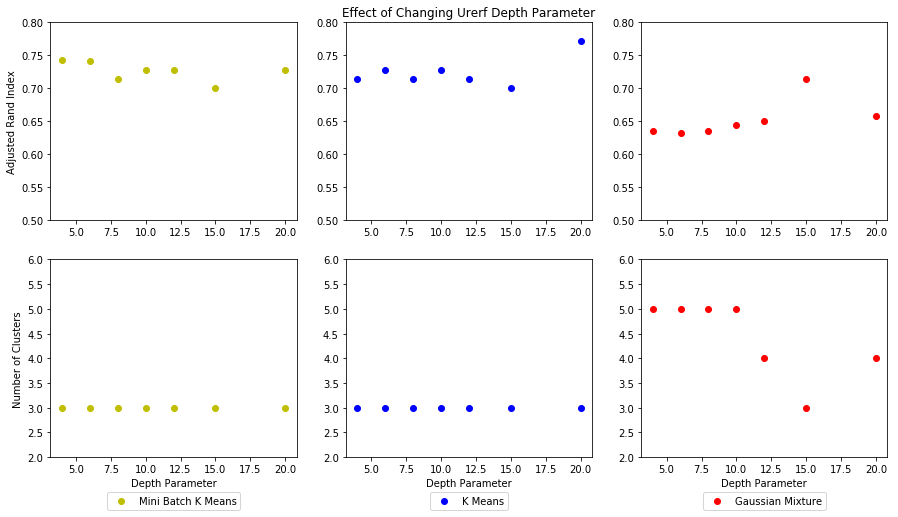

In [100]:
dataMini_depth = np.matrix(dataMini_depth)
dataKmeans_depth = np.matrix(dataKmeans_depth)
dataGMM_depth = np.matrix(dataGMM_depth)
dataMini_kvalue = np.matrix(dataMini_kvalue)
dataKmeans_kvalue = np.matrix(dataKmeans_kvalue)
dataGMM_kvalue = np.matrix(dataGMM_kvalue)
dataMini_dim = np.matrix(dataMini_dim)
dataKmeans_dim = np.matrix(dataKmeans_dim)
dataGMM_dim = np.matrix(dataGMM_dim)
print(dataMini_depth)
print(dataKmeans_depth)
print(dataGMM_depth)
print(dataMini_kvalue)
print(dataKmeans_kvalue)
print(dataGMM_kvalue)
print(dataMini_dim)
print(dataKmeans_dim)
print(dataGMM_dim)

plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
plt.scatter(dim, dataMini_dim[:,2].tolist(), c = 'y', label='Mini Batch K Means')
plt.ylabel('Adjusted Rand Index')
ax = plt.gca()
ax.set_ylim(0.4,1.0)
plt.subplot(2,3,2)
plt.scatter(dim, dataKmeans_dim[:,2].tolist(), c = 'b', label='K Means')
plt.title("Effect of Changing Embedding Dimension")
ax = plt.gca()
ax.set_ylim(0.4,1.0)
plt.subplot(2,3,3)
plt.scatter(dim, dataGMM_dim[:,2].tolist(), c = 'r', label='Gaussian Mixture')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.17))
ax = plt.gca()
ax.set_ylim(0.4,1.0)
plt.subplot(2,3,4)
plt.scatter(dim, dataMini_dim[:,1].tolist(), c = 'y', label='Mini Batch K Means')
plt.xlabel('Dimensions')
plt.ylabel('Number of Clusters')
ax = plt.gca()
ax.set_ylim(2,9)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.17))
plt.subplot(2,3,5)
plt.scatter(dim, dataKmeans_dim[:,1].tolist(), c = 'b', label='K Means')
plt.xlabel('Dimensions')
ax = plt.gca()
ax.set_ylim(2,9)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.17))
plt.subplot(2,3,6)
plt.scatter(dim, dataGMM_dim[:,1].tolist(), c = 'r', label='Gaussian Mixture')
plt.xlabel('Dimensions')
ax = plt.gca()
ax.set_ylim(2,9)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.17))


plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
plt.scatter(k_varying, dataMini_kvalue[:,2].tolist(), c = 'y', label='Mini Batch K Means')
plt.ylabel('Adjusted Rand Index')
ax = plt.gca()
ax.set_ylim(0.5,0.8)
plt.subplot(2,3,2)
plt.scatter(k_varying, dataKmeans_kvalue[:,2].tolist(), c = 'b', label='K Means')
plt.title("Effect of Changing Urerf k Parameter")
ax = plt.gca()
ax.set_ylim(0.5,0.8)
plt.subplot(2,3,3)
plt.scatter(k_varying, dataGMM_kvalue[:,2].tolist(), c = 'r', label='Gaussian Mixture')
ax = plt.gca()
ax.set_ylim(0.5,0.8)
plt.subplot(2,3,4)
plt.scatter(k_varying, dataMini_kvalue[:,1].tolist(), c = 'y', label='Mini Batch K Means')
plt.xlabel('k Parameter')
plt.ylabel('Number of Clusters')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.17))
ax = plt.gca()
ax.set_ylim(2,6)
plt.subplot(2,3,5)
plt.scatter(k_varying, dataKmeans_kvalue[:,1].tolist(), c = 'b', label='K Means')
plt.xlabel('k Parameter')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.17))
ax = plt.gca()
ax.set_ylim(2,6)
plt.subplot(2,3,6)
plt.scatter(k_varying, dataGMM_kvalue[:,1].tolist(), c = 'r', label='Gaussian Mixture')
plt.xlabel('k Parameter')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.17))
ax = plt.gca()
ax.set_ylim(2,6)

plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
plt.scatter(depth_varying, dataMini_depth[:,2].tolist(), c = 'y', label='Mini Batch K Means')
plt.ylabel('Adjusted Rand Index')
ax = plt.gca()
ax.set_ylim(0.5,0.8)
plt.subplot(2,3,2)
plt.scatter(depth_varying, dataKmeans_depth[:,2].tolist(), c = 'b', label='K Means')
plt.title("Effect of Changing Urerf Depth Parameter")
ax = plt.gca()
ax.set_ylim(0.5,0.8)
plt.subplot(2,3,3)
plt.scatter(depth_varying, dataGMM_depth[:,2].tolist(), c = 'r', label='Gaussian Mixture')
ax = plt.gca()
ax.set_ylim(0.5,0.8)
plt.subplot(2,3,4)
plt.scatter(depth_varying, dataMini_depth[:,1].tolist(), c = 'y', label='Mini Batch K Means')
plt.xlabel('Depth Parameter')
plt.ylabel('Number of Clusters')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15))
ax = plt.gca()
ax.set_ylim(2,6)
plt.subplot(2,3,5)
plt.scatter(depth_varying, dataKmeans_depth[:,1].tolist(), c = 'b', label='K Means')
plt.xlabel('Depth Parameter')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15))
ax = plt.gca()
ax.set_ylim(2,6)
plt.subplot(2,3,6)
plt.scatter(depth_varying, dataGMM_depth[:,1].tolist(), c = 'r', label='Gaussian Mixture')
plt.xlabel('Depth Parameter')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.15))
ax = plt.gca()
ax.set_ylim(2,6)

In [10]:
# cluster using the best affinity propagation output
af = AffinityPropagation(damping = maxDamp, preference = maxPre,affinity="precomputed").fit(inputMat)
cluster_centers_indices = af.cluster_centers_indices_
labels_best_af = af.labels_
n_clusters_af = len(cluster_centers_indices)


# cluster using the best mini batch k means output
mb = MiniBatchKMeans(n_clusters= maxClusters, batch_size = maxSize).fit(mat)
cluster_centers_ = mb.cluster_centers_
labels_best_mb = mb.labels_
n_clusters_mb = len(cluster_centers_)


In [11]:

## Sort similarity matrix based on clusters
#create a dictionary of labels and flowers
nodeDict = dict(enumerate(labels_best_af))
#sort the flowers so that they are grouped by cluster label
s = sorted(nodeDict, key=nodeDict.get)
#create a sorted similarity matrix
sortedSimMat = np.empty((len(s), len(s)))
for i in range(0, len(s)):
    node = s[i]
    for j in range(0,len(s)):
        node2 = s[j]
        sortedSimMat[i][j] = inputMat[node, node2]

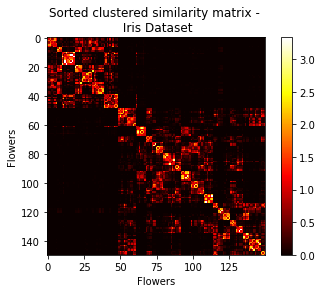

In [12]:
#create a heat map of the sorted similarity matrix
plt.figure(1)
im = plt.imshow(sortedSimMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Flowers')
plt.ylabel('Flowers')
plt.title("Sorted clustered similarity matrix - \n Iris Dataset")
plt.show()

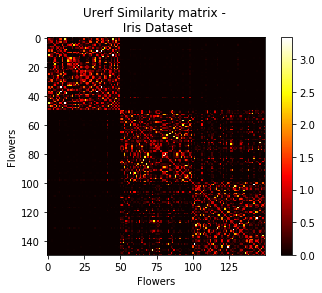

In [13]:
#create a heat map of the sorted similarity matrix
plt.figure(2)
im = plt.imshow(inputMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Flowers')
plt.ylabel('Flowers')
plt.title("Urerf Similarity matrix - \n Iris Dataset")
plt.show()

AFFINITY PROPAGATION
Number of Clusters =  29
Accuracy 0.0466666666667


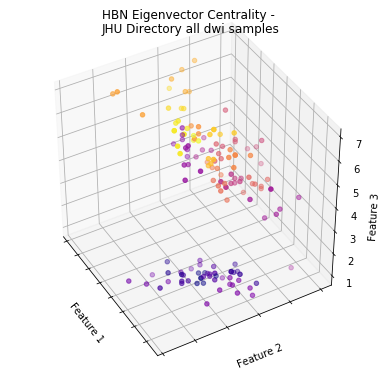

In [23]:
###### Create a plot of the clusters color-coded as such ######
from sklearn.metrics import accuracy_score
print('AFFINITY PROPAGATION')
if (numFeatures ==2):
    graph2DLabels(mat,labels_best_af)
if (numFeatures ==3):
    graph3DLabels(mat,labels_best_af)
print("Number of Clusters = ", n_clusters_af)
print("Accuracy", accuracy_score(labels_best_af, iris.target))

MINI BATCH K MEANS
Number of Clusters =  10
Accuracy 0.0933333333333


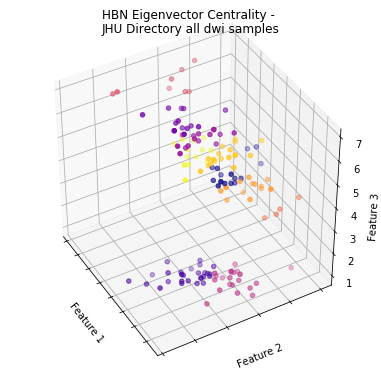

In [24]:
###### Create a plot of the clusters color-coded as such ######
print('MINI BATCH K MEANS')
if (numFeatures ==2):
    graph2DLabels(mat,labels_best_mb)

if (numFeatures ==3):
    graph3DLabels(mat,labels_best_mb)
print("Number of Clusters = ", n_clusters_mb)
print("Accuracy", accuracy_score(labels_best_mb, iris.target))

In [25]:
##### Compare the two Algorithms #####
print("Accuracy", accuracy_score(labels_best_mb, labels_best_af))
print(labels_best_af)
print(labels_best_mb)

Accuracy 0.0533333333333
[ 0  2  7  7  0  1  7  4  2  2  5  4  2  7  6  6  6  0  1  3  5  3  7  4  4
  2  4  0  0  7  2  5  3  6  2  7  5  2  7  4  0 10  7  4  1  2  3  7  3  0
  8  9  8 17 11 12  9 10 11 10 10 18 14 16 18  8 12 13 14 17  9 19 15 16 19
 11 11 28 19 17 17 17 13 20 12  9  8 14 18 17 17 24 13 10 13 18 18 19 10 13
 27 20 26 25 21 23 10 23 15 22  9 25 21 20 20  9 21 22 23 14 27 20 23 15 27
 26 16 24 25 26 23 22 25 16 25 26 27 21 24  8 27  8 20 27 27 28 15 28 27 24]
[1 4 4 4 1 1 4 1 4 4 1 4 4 4 1 1 1 1 1 1 1 1 4 1 4 4 1 1 1 4 4 1 1 1 4 4 1
 4 4 1 1 4 4 1 1 4 1 4 1 4 9 9 9 7 9 0 9 6 9 7 6 0 0 8 7 9 0 0 0 7 8 0 8 8
 9 9 9 9 0 7 7 7 0 8 7 9 9 0 7 7 7 8 0 6 7 0 0 0 6 0 2 8 2 3 2 5 7 5 2 2 3
 3 2 8 8 3 3 5 5 8 2 8 5 8 2 2 8 8 3 2 5 5 3 3 3 5 3 3 8 2 2 3 8 2 2 3 8 3
 3 8]


Text(0,0.5,'Number of Clusters')

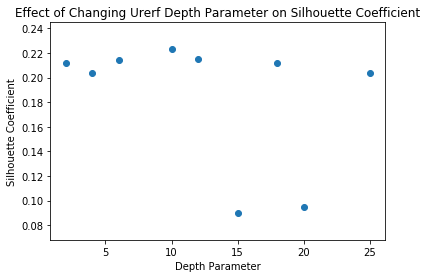

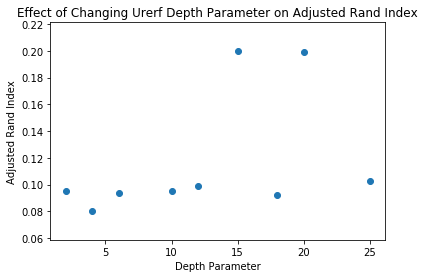

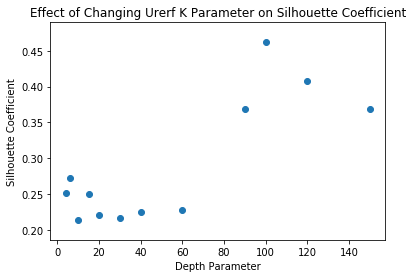

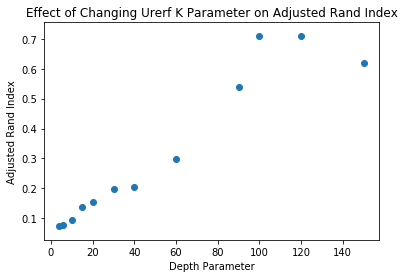

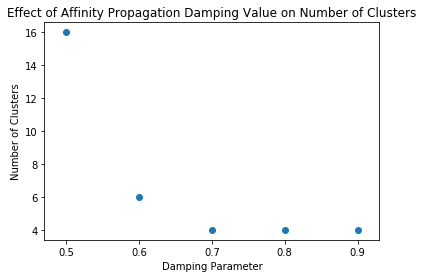

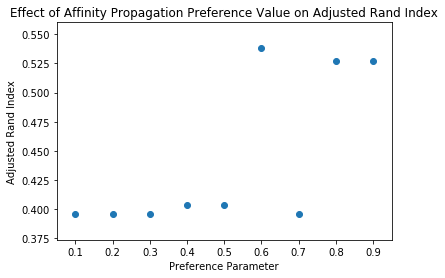

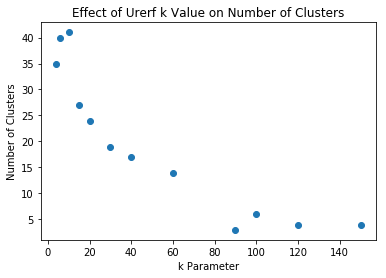

In [169]:
###### Plotting Collected Data ########


plt.figure()
depthValues = [4,10,2,12,6,15,25,20,18]
ssDepthValues = [0.204,0.223,0.212,0.215,0.214,.090,.204,.095,.212]
ariDepthValues = [0.08,0.095,0.095,0.099,0.094,.200,.103,.199,.092]
plt.scatter(depthValues, ssDepthValues)
plt.title("Effect of Changing Urerf Depth Parameter on Silhouette Coefficient")
plt.xlabel('Depth Parameter')
plt.ylabel('Silhouette Coefficient')
plt.figure()
plt.scatter(depthValues, ariDepthValues)
plt.title("Effect of Changing Urerf Depth Parameter on Adjusted Rand Index")
plt.xlabel('Depth Parameter')
plt.ylabel('Adjusted Rand Index')
plt.figure()
kValues = [10,6,4,15,20,30,40,60,100,120, 150, 90]
sskValues = [0.214,0.272,0.252,0.25, .221,.217,.225, .228,.462,.408, .369, .369]
ariKValues = [0.094,0.076,0.075,0.137, .156,.198,.204, .298, .708,.708, .618, .538]
plt.scatter(kValues, sskValues)
plt.title("Effect of Changing Urerf K Parameter on Silhouette Coefficient")
plt.xlabel('Depth Parameter')
plt.ylabel('Silhouette Coefficient')
plt.figure()
plt.scatter(kValues, ariKValues)
plt.title("Effect of Changing Urerf K Parameter on Adjusted Rand Index")
plt.xlabel('Depth Parameter')
plt.ylabel('Adjusted Rand Index')

plt.figure()
dampValues = [.5,.6,.7,.8,.9]
numClusters = [16,6,4,4,4]
plt.scatter(dampValues, numClusters)
plt.title("Effect of Affinity Propagation Damping Value on Number of Clusters")
plt.xlabel('Damping Parameter')
plt.ylabel('Number of Clusters')

plt.figure()
preValues = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
numClusters = [.396,.396,.396,.404,.404,.538,.396,.527,.527]
plt.scatter(preValues, numClusters)
plt.title("Effect of Affinity Propagation Preference Value on Adjusted Rand Index")
plt.xlabel('Preference Parameter')
plt.ylabel('Adjusted Rand Index')

plt.figure()
kValues2 = [10,6,4,15,20,30,40,60,100,120, 150, 90]
numClusters = [41, 40, 35, 27, 24, 19, 17, 14, 6, 4, 4, 3]
plt.scatter(kValues2, numClusters)
plt.title("Effect of Urerf k Value on Number of Clusters")
plt.xlabel('k Parameter')
plt.ylabel('Number of Clusters')